## Positional PRC 

Window size = length of PWM 

Window overlap with motif threshold for positive = 0.8 

Window stride = 1


In [1]:
# Making sure our results are reproducible
from numpy.random import seed
seed(1234)
from tensorflow import set_random_seed
set_random_seed(1234)

In [2]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from dragonn.tutorial_utils import *
from dragonn.utils import *
from dragonn.positional_prc import * 
from dragonn.callbacks import * 


#To prepare for model training, we import the necessary functions and submodules from keras
from keras.models import Sequential
from keras.layers.core import Dropout, Reshape, Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta, SGD, RMSprop;
import keras.losses;
from keras.constraints import maxnorm;
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping, History
from keras import backend as K 
K.set_image_data_format('channels_last')



Using TensorFlow backend.
/users/annashch/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
## Simulate data 

motif_density_localization_simulation_parameters = {
    "motif_name": "TAL1_known4",
    "seq_length": 1500,
    "center_size": 150,
    "min_motif_counts": 2,
    "max_motif_counts": 4, 
    "num_pos": 3000,
    "num_neg": 3000,
    "GC_fraction": 0.4}

simulation_data = get_simulation_data("simulate_motif_density_localization",
                                      motif_density_localization_simulation_parameters,
                                      validation_set_size=1000, test_set_size=1000)

In [4]:
#We define a custom callback to print training and validation metrics while training. 
metrics_callback=MetricsCallback(train_data=(simulation_data.X_train,simulation_data.y_train),
                                 validation_data=(simulation_data.X_valid,simulation_data.y_valid))

#Define the model architecture in keras
regularized_keras_model=Sequential() 
regularized_keras_model.add(Conv2D(filters=15,kernel_size=(1,10),input_shape=simulation_data.X_train.shape[1::]))
regularized_keras_model.add(Activation('relu'))
regularized_keras_model.add(Dropout(0.2))
regularized_keras_model.add(MaxPooling2D(pool_size=(1,35)))

regularized_keras_model.add(Conv2D(filters=15,kernel_size=(1,10),input_shape=simulation_data.X_train.shape[1::]))
regularized_keras_model.add(Activation('relu'))
regularized_keras_model.add(Dropout(0.2))

regularized_keras_model.add(Conv2D(filters=15,kernel_size=(1,10),input_shape=simulation_data.X_train.shape[1::]))
regularized_keras_model.add(Activation('relu'))
regularized_keras_model.add(Dropout(0.2))


regularized_keras_model.add(Flatten())
regularized_keras_model.add(Dense(1))
regularized_keras_model.add(Activation("sigmoid"))

##compile the model, specifying the Adam optimizer, and binary cross-entropy loss. 
regularized_keras_model.compile(optimizer='adam',
                               loss='binary_crossentropy')


In [5]:
## use the keras fit function to train the model for 150 epochs with early stopping after 3 epochs 
history=regularized_keras_model.fit(x=simulation_data.X_train,
                                  y=simulation_data.y_train,
                                  batch_size=128,
                                  epochs=150,
                                  verbose=0,
                                  callbacks=[EarlyStopping(patience=3),
                                            History(),
                                            metrics_callback],
                                  validation_data=(simulation_data.X_valid,
                                                   simulation_data.y_valid))


Training Data:
Loss: 0.6923	Balanced Accuracy: 52.07%	 auROC: 0.532	 auPRC: 0.521
	Recall at 5%|10%|20% FDR: 0.2%|0.2%|0.3%	 Num Positives: 1957	 Num Negatives: 2043
Validation Data:
Loss: 0.6922	Balanced Accuracy: 52.16%	 auROC: 0.519	 auPRC: 0.547
	Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 528	 Num Negatives: 472
Training Data:
Loss: 0.6906	Balanced Accuracy: 53.67%	 auROC: 0.570	 auPRC: 0.551
	Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.5%	 Num Positives: 1957	 Num Negatives: 2043
Validation Data:
Loss: 0.6923	Balanced Accuracy: 52.33%	 auROC: 0.543	 auPRC: 0.568
	Recall at 5%|10%|20% FDR: 0.4%|0.4%|0.4%	 Num Positives: 528	 Num Negatives: 472
Training Data:
Loss: 0.6814	Balanced Accuracy: 59.05%	 auROC: 0.678	 auPRC: 0.657
	Recall at 5%|10%|20% FDR: 0.6%|2.5%|6.8%	 Num Positives: 1957	 Num Negatives: 2043
Validation Data:
Loss: 0.6865	Balanced Accuracy: 57.73%	 auROC: 0.641	 auPRC: 0.657
	Recall at 5%|10%|20% FDR: 1.5%|2.1%|2.7%	 Num Positives: 528	 Num Negatives: 472
Trai

Training Data:
Loss: 0.0748	Balanced Accuracy: 97.53%	 auROC: 0.997	 auPRC: 0.997
	Recall at 5%|10%|20% FDR: 99.5%|99.9%|100.0%	 Num Positives: 1957	 Num Negatives: 2043
Validation Data:
Loss: 0.1024	Balanced Accuracy: 96.35%	 auROC: 0.992	 auPRC: 0.992
	Recall at 5%|10%|20% FDR: 98.9%|99.6%|100.0%	 Num Positives: 528	 Num Negatives: 472
Training Data:
Loss: 0.0759	Balanced Accuracy: 97.42%	 auROC: 0.997	 auPRC: 0.997
	Recall at 5%|10%|20% FDR: 99.7%|100.0%|100.0%	 Num Positives: 1957	 Num Negatives: 2043
Validation Data:
Loss: 0.1007	Balanced Accuracy: 96.97%	 auROC: 0.992	 auPRC: 0.992
	Recall at 5%|10%|20% FDR: 99.2%|99.8%|100.0%	 Num Positives: 528	 Num Negatives: 472
Training Data:
Loss: 0.0775	Balanced Accuracy: 97.35%	 auROC: 0.997	 auPRC: 0.997
	Recall at 5%|10%|20% FDR: 99.6%|99.9%|100.0%	 Num Positives: 1957	 Num Negatives: 2043
Validation Data:
Loss: 0.1013	Balanced Accuracy: 96.87%	 auROC: 0.993	 auPRC: 0.992
	Recall at 5%|10%|20% FDR: 99.2%|99.8%|100.0%	 Num Positives: 528

In [6]:
## Use the keras predict function to get model predictions on held-out test set. 
test_predictions=regularized_keras_model.predict(simulation_data.X_test)
## Generate a ClassificationResult object to print performance metrics on held-out test set 
print(ClassificationResult(simulation_data.y_test,test_predictions))

Loss: 0.0805	Balanced Accuracy: 97.36%	 auROC: 0.996	 auPRC: 0.996
	Recall at 5%|10%|20% FDR: 99.6%|100.0%|100.0%	 Num Positives: 515	 Num Negatives: 485


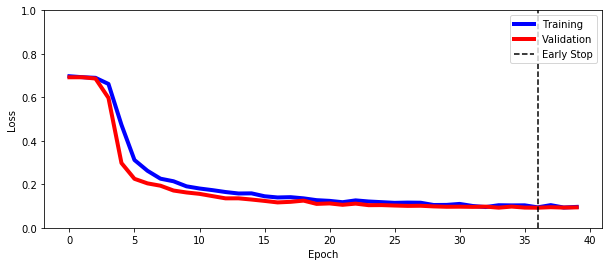

In [7]:
## Visualize the model's performance 
plot_learning_curve(history)

In [8]:
#get the indices of the positive examples -- we want to do a separate interpretation for positive examples only 
pos_indx=np.flatnonzero(simulation_data.y_valid==1)
pos_X=simulation_data.X_valid[pos_indx]

### Motif scores (all)

In [9]:
motif_scores=get_motif_scores(simulation_data.X_valid,simulation_data.motif_names)

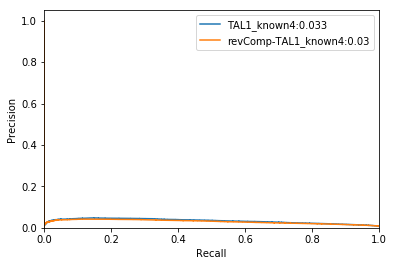

In [10]:
motif_score_posPRC=positionalPRC(simulation_data.valid_embeddings,motif_scores)
plot_positionalPRC(motif_score_posPRC)

### Motif scores (positives)

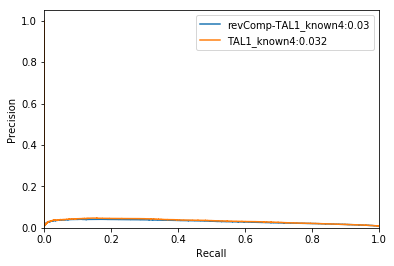

In [11]:
motif_score_posPRC=positionalPRC([simulation_data.valid_embeddings[i] for i in pos_indx],motif_scores[pos_indx])
plot_positionalPRC(motif_score_posPRC)

### In silico mutagenesis (all)

In [12]:
from dragonn.tutorial_utils import in_silico_mutagenesis, plot_ism
ism_vals=in_silico_mutagenesis(regularized_keras_model,simulation_data.X_valid)
#take the maximum along the third axis of the absolute values -- we care only about magnitude of change 
ism_collapsed=np.max(abs(ism_vals),axis=2)
print(ism_collapsed.shape)


(1000, 1500)


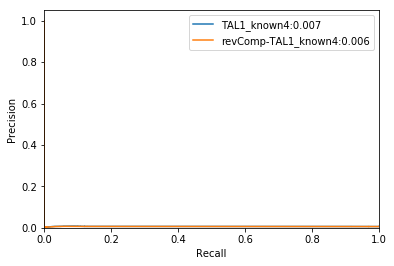

In [13]:
ism_posPRC=positionalPRC(simulation_data.valid_embeddings,ism_collapsed)
plot_positionalPRC(ism_posPRC)



### In silico mutagenesis (positives)

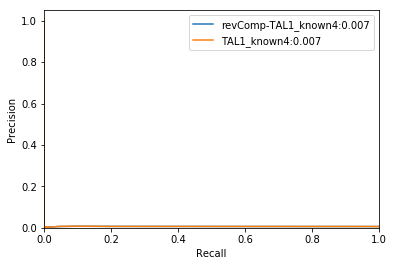

In [14]:
ism_posPRC=positionalPRC([simulation_data.valid_embeddings[i] for i in pos_indx],ism_collapsed[pos_indx])
plot_positionalPRC(ism_posPRC)

### Gradient x Input (all)

In [15]:
from dragonn.tutorial_utils import  input_grad,plot_seq_importance
gradxinput=input_grad(regularized_keras_model,simulation_data.X_valid)*simulation_data.X_valid
gradxinput=np.squeeze(gradxinput)
gradxinput_collapsed=np.max(gradxinput,axis=2)
print(gradxinput_collapsed.shape)

(1000, 1500)


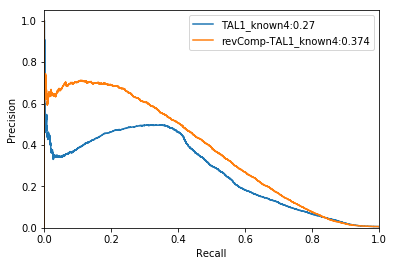

In [16]:
gradxinput_PRC=positionalPRC(simulation_data.valid_embeddings,gradxinput_collapsed)
plot_positionalPRC(gradxinput_PRC)

### Gradient x Input (positives)

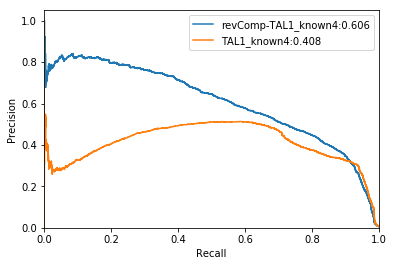

In [17]:
gradxinput_PRC=positionalPRC([simulation_data.valid_embeddings[i] for i in pos_indx],gradxinput_collapsed[pos_indx])
plot_positionalPRC(gradxinput_PRC)

### DeepLIFT (all)

In [18]:
from dragonn.tutorial_utils import deeplift
dl=deeplift(regularized_keras_model,simulation_data.X_valid)
dl=dl.squeeze() 
dl_collapsed=np.max(dl,axis=2)
print(dl_collapsed.shape)

(1000, 1500)


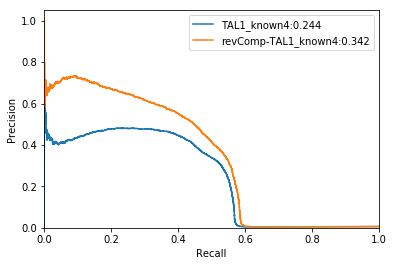

In [19]:
dl_PRC=positionalPRC(simulation_data.valid_embeddings,dl_collapsed)
plot_positionalPRC(dl_PRC)

### DeepLIFT (positives)

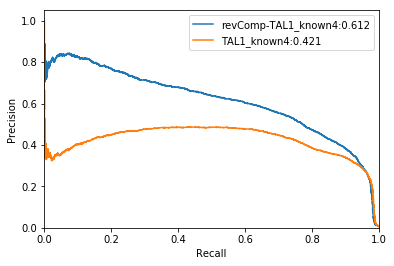

In [20]:
dl_PRC=positionalPRC([simulation_data.valid_embeddings[i] for i in pos_indx],dl_collapsed[pos_indx])
plot_positionalPRC(dl_PRC)